In [1]:
%reset -f
import sys
# sys.path.append("/home/jose/Documents/Maestria/Codigo/OTI/build/")
# sys.path.append("/Users/maristi7/coding/otilib/build")
# sys.path.append("anterior/")
import Calc_Cable as cab
# import Calc_Cable_20201116 as cab_old
import pyoti.sparse as oti
import numpy as np
import matplotlib.pyplot as plt

Conf. 0: x = 0.24300198860068611 , y = 0.22035453896228327
Conf. 1: x = 0.22383389623785754 , y = 0.24128017734375387
Conf. 2: x = 0.2114468317349867 , y = 0.25277920512159663


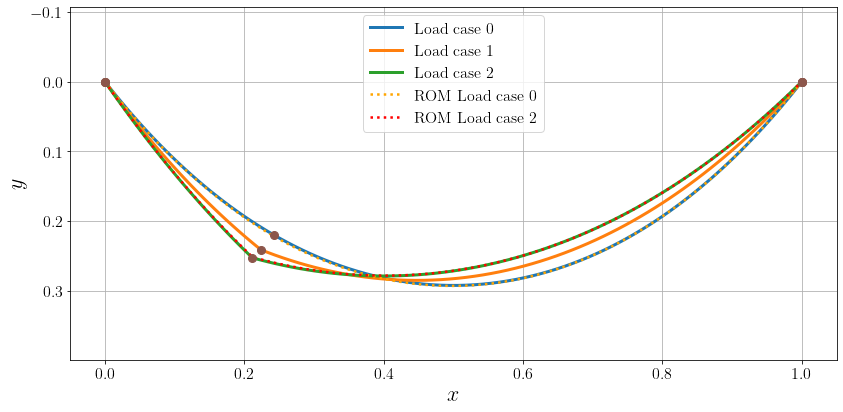

In [3]:
#SOLUCION PARA EL CABLE DEL PAPER IRVINE
order = 2
nbases = 7

for u in range(3):
    #Lectura de datos de entrada
    l,h,L0,A0,E,w,cargas = cab.leer_entradas("Irvine_"+str(u))
    cargas = cargas.astype(object)
    F = cargas[0][0]
    
    #Pertubar parametros 
#     e1 = oti.e(1,nbases=nbases, order=order)
#     e2 = oti.e(2,nbases=nbases, order=order)
#     e3 = oti.e(3,nbases=nbases, order=order)
#     e4 = oti.e(4,nbases=nbases, order=order)
#     e5 = oti.e(5,nbases=nbases, order=order)
#     e6 = oti.e(6,nbases=nbases, order=order)
    e7 = oti.e(7,nbases=nbases, order=order)
#     l = l + e1
#     h = h + e2
#     L0 = L0 + e3
#     A0 = A0 + e4
#     E = E + e5
#     w = w + e6
    F = F + e7
    cargas[0][0] = F

    #convertir adimensionales
    gamma,delta,beta,Psi,Sigmas = cab.param_adim(l,h,L0,A0,E,w,cargas)

    #calcular las incognitas gi fi
    gi_0, fi_0 = 0.275, 0.275 #valores iniciales para iterar en newton
    gi,fi = cab.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)
    #print(gi.real*w.real*L0.real,fi.real*w.real*L0.real)
    
    #calcular curva
    p = 100 #puntos de la curva
    A = cab.curva(nbases,order,gi,fi,beta,Psi,Sigmas,p)

    #Convertir a dimensionales    
    x = (A[:,0]*L0).get_deriv(0)
    y = (A[:,1]*L0).get_deriv(0)
    T = (A[:,2]*w*L0).get_deriv(0)
    
    #Graficar cable
    if u==0 or u==1:
        cab.plot_curva(x,y,T,u,np.array([[None]]), [None], [None], [None] )
    
    else:
        cab.plot_curva(x,y,T,u,x_0,x_2,y_0,y_2)
    #Calculo de curvas por modelo de orden reducido
    if u==1:
        x_1 = A[:,0]*L0
        y_1 = A[:,1]*L0
        
        x_0 = x_1.rom_eval([7],[-9.8]).get_deriv(0)
        y_0 = y_1.rom_eval([7],[-9.8]).get_deriv(0)
        x_2 = x_1.rom_eval([7],[9.8]).get_deriv(0)
        y_2 = y_1.rom_eval([7],[9.8]).get_deriv(0)
        
plt.tight_layout()
plt.savefig("Irvine_oti.pdf")

In [3]:
#SOLUCION PARA EL CABLE DEL PAPER IRVINE
order = 2
nbases = 6

for u in range(3):
    #Lectura de datos de entrada
    l,h,L0,A0,E,w,cargas = cab_old.leer_entradas("Irvine_"+str(u))
    
    #Pertubar parametros (no sirve para perturbar cargas y ubicacion s de las cargas)
    e1 = oti.e(1,nbases=nbases, order=order)
    e2 = oti.e(2,nbases=nbases, order=order)
    e3 = oti.e(3,nbases=nbases, order=order)
    e4 = oti.e(4,nbases=nbases, order=order)
    e5 = oti.e(5,nbases=nbases, order=order)
    e6 = oti.e(6,nbases=nbases, order=order)
    l = l + e1
    h = h + e2
    L0 = L0 + e3
    A0 = A0 + e4
    E = E + e5
    w = w + e6

    #convertir adimensionales
    gamma,delta,beta,Psi,Sigmas = cab_old.param_adim(l,h,L0,A0,E,w,cargas)

    #calcular las incognitas gi fi
    gi_0, fi_0 = 0.275, 0.275 #valores iniciales para iterar en newton
    gi,fi = cab_old.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)

    #calcular curva
    p = 100 #puntos de la curva
    A = cab_old.curva(nbases,order,gi,fi,beta,Psi,Sigmas,p)

    #Convertir a dimensionales    
    x = (A[:,0]*L0).get_deriv(0)
    y = (A[:,1]*L0).get_deriv(0)
    T = (A[:,2]*w*L0).get_deriv(0)

    #Graficar cable
    cab_old.plot_curva(x,y,T,u)

NameError: name 'cab_old' is not defined